<center><img src="https://www.mindinventory.com/blog/wp-content/uploads/2019/04/python-development-1200x500.png" width="1000"></center>

# Programa de Especialización en Python

## Tema 7: Regresión Logística

### Prof. Manuel Sigüeñas, M.Sc.(c)
[msiguenas@socialdata-peru.com](msiguenas@socialdata-peru.com)

<a id='beginning'></a>

1. [Introducción](#part1)

    a. [Definición](#part2) 
        
    b. [Predicción de clases](#part3)

    c. [Evaluación de la predicción](#part4) 


2. [Clasificación basada en modelos estadísticos](#part5) 
 
 a. [Introducción](#part6) 
 
 b. [Regresión Logística Binaria](#part7) 
 
 c. [El Modelo Logísitico](#part8) 
 
 d. [Definición del Modelo](#part9) 
 
 e. [Criterios de Selección de Modelos I](#part10) 
 
 f. [Criterios de Ajuste](#part11)
 
 g. [Curva ROC](#part12)

____
[Ir a inicio](#beginning)

In [4]:
from IPython.display import Image
%matplotlib inline

<a id='part1'></a>
# Introducción

<a id='part2'></a>
## Definición

- Dado un conjunto de registros(conjunto de entrenamineto)
    <br>
    
    - Cada registro contiene un conjunto de atributos, donde uno de ellos es la clase.

- Encontrar un modelo para el atributo de la clase en función de los valores de los démas atributos.
<br>

- Objetivo: Nuevos registro sean asignados a una clase con la mayor precisión posible.              
<br>

    -  Un conjunto de prueba es usada para determinar la precisión del modelo. Usualmente, el conjunto de datos original es dividido en un conjunto de prueba y de entrenamineto, donde el conjunto de entrenamiento es usado para construir el modelo y el de prueba para validarlo.

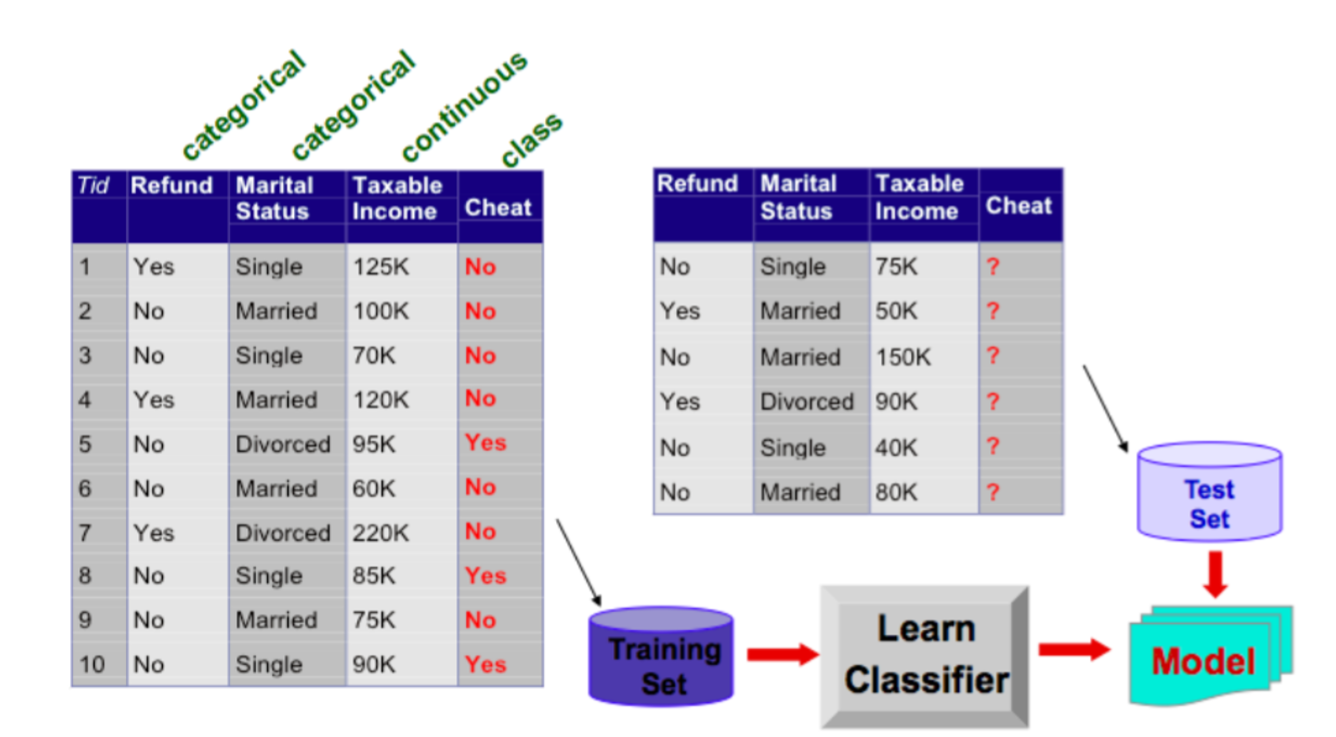

In [6]:
Image(filename="D:/Python/2. Nivel II/7/imagenes/imagen1.png", width=600) 

____
[Ir a inicio](#beginning)

<a id='part3'></a>
## Predicción

- Los modelos de clasificación generan dos tipos de predicciones:
<br>
    
    - Continuas: Usualmente en la forma de una probabilidad (los valores predichos de pertenencia a una clase para un individuo está entre 0 y 1).
    <br>
    
    - Categóricas (discretas): Clase predicha.

- Para la mayoría de las aplicaciones práticas, la predicción de una categoría discreta es necesaria para poder tomar una decisión y es el objetivo de la predicción. Ejemplo: Filtro automático de spam.

- La probabilidad estimada para cada clase puede se muy útil para medir el ajuste del modelo sobre la clasificación predicha: 
<br>

    - Un mensaje por email con una probabilidad de ser spam de 0.51 puede ser clasificado de manera similar que otro mensaje con una probabilidad de 0.99.

- En algunas aplicaciones el resultado deseado es la probabilidad de pertenecer a una clase, la que será usada como entrada para otros cálculos.
<br>

    - Ejemplo 1: Una compañia de seguros desea descubrir y procesar reclamos fraudulentos. Usando datos históricos, se puede construir un modelo pra predecir la probabilidad de un reclamo fraudulento. Esra probabilidad podría combinarse con los costos de investigación de la compañia y la perdida monetaria potencial para determinar si la investigación tiene un interés financiero para la institución.
    <br>
    
    - Ejemplo 2: El CLV (Customer Life Value) está definido como el monto del beneficio asociado con un cliente sobre un periodo de tiempo (Gupta et al. 2006). Para estimar el CLV, varias cantidades son requeridas, incluyendo el monto pagado por un cliente sobre el tiempo en estudio, el costo de mantenimineto del cliente, y la probabilidad de que el cliente realice una nueva compra durante ese tiempo. 

- Algunos modelos usados para la clasificación, como las redes neuronales y mínimos cuadrados parciales, producen predicciones continuas que no siguen la definición de una valor de probabilidad predicho (los valores no están en la escala 0 a 1, o no suman 1 las probabilidades de todas las categorías).
<br>

- En situaciones como la descrita anteriormente, es posible usar una transformación para coercer las predicciones en un tipo de escala de probabilidad, de tal forma que puedan ser interpretados y usados para la clasificación. Uno de los principales métodos usados para esta finalidad es la transformación SoftMax (Bridle 1990).

$$\widehat{P}l^*= \frac{e^{\widehat{y}l}}{\sum^C_{l=1}e^{\widehat{y}l}}$$

- Donde $\widehat{y}l$ es la predicción numérica para la $l-ésima$ clase y $\widehat{P}l^*$ es el valor trnasformado entre 0 y 1.

- Donde $\widehat{y}l$ es la predicción numérica para la $l-ésima$ clase y $\widehat{P}l^*$ es el valor trnasformado entre 0 y 1.

____
[Ir a inicio](#beginning)

<a id='part4'></a>
## Evaluación de las clases Predichas I

- Un método común para describir la performance de la clasificacióm es la matriz de confunsión.
<br>

- Esta es una simple tabualción cruzada para las clases observadas y predichas.

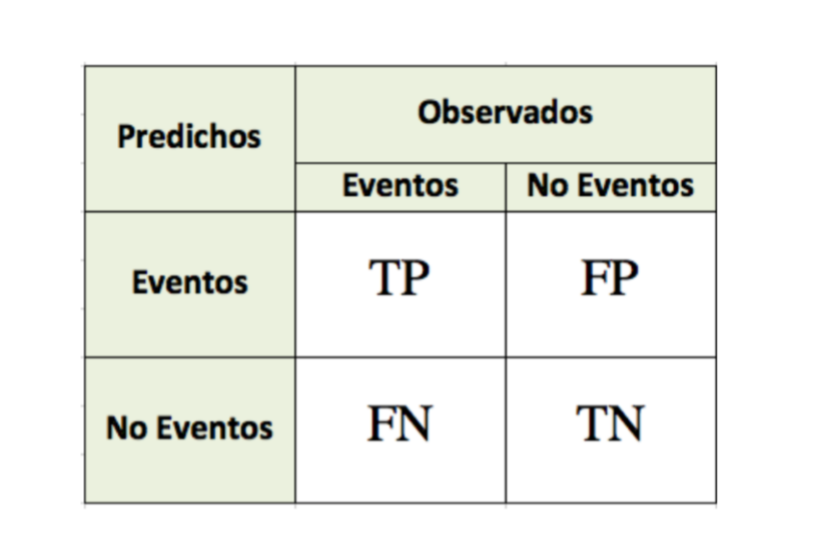

In [7]:
Image(filename="D:/Python/2. Nivel II/7/imagenes/imagen2.png", width=600) 

Figura: Matriz de confusión para un problema de clasificación con dos clases (eventos y no eventos). Las celdas de la tabla indican el número de verdaderos positivos (TP), falsos positivos (FP), verdaderos negativos (TN) y los falsos negativos (FN).

- La métrica más simple es el ratio de la precisión total (o, siendo pesimistas, el ratio de error).
<br>

- Este patrón es un indicador de que el modelo tiene una pobre calibración y tambien desempeño.

____
[Ir a inicio](#beginning)

<br>
<br>

<a id='part5'></a>
# Clasificación basada en modelos estadísticos

<a id='part6'></a>
## 1. Introducción


### Conjunto de datos

- Ilustraremos la aplicación de los métodos más tradicionales usados en clasificación a traveés de la data simulada Default.
<br>

- El interés es predecir si un individuo va a incumplir en el pago de su tarjeta de crédito, sobre la base de su nigreso anual y el balance mensual de la tarjeta.
<br>

- Las variables del conjunto de datos son mostradas en la figura.

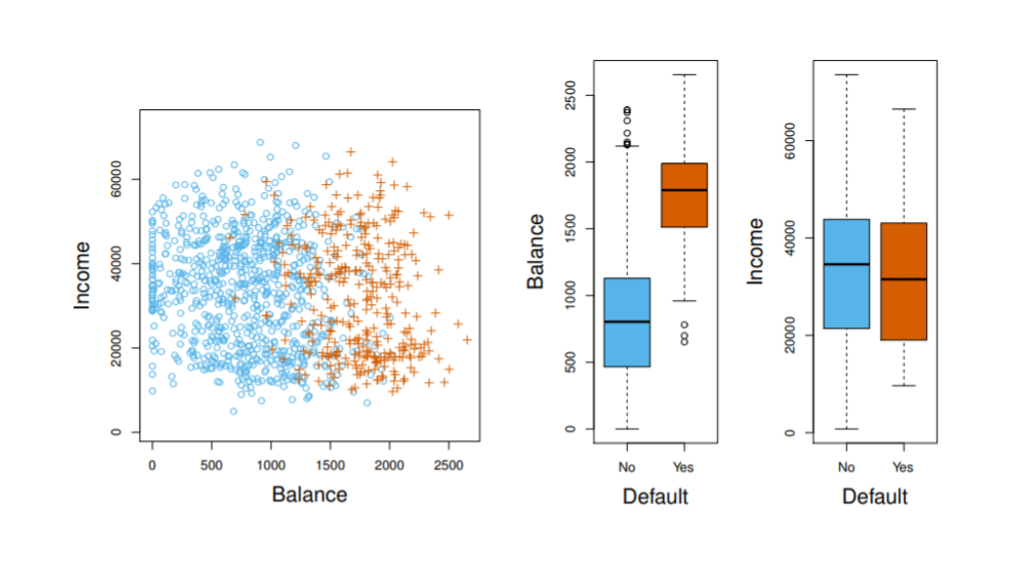

In [8]:
Image(filename="D:/Python/2. Nivel II/7/imagenes/imagen3.png", width=600) 

- La gráfica muestra el ingreso anual (income) y el estado de cuenta de la tarjeta (balance) para un conjunto de 10000 individuos.

- La gráfica de la izquierda muestra a los individuos que no cumplieron con el pago de su tarjeta en un determinado mes en color naranja y aquellos que si lo hicieron en azul (El ratio total de clientes morosos es de alrededor del 3%, por lo que solo se muestra una fraccióm de los individuos que no son morosos).
<br>

- En ambas figura puede verse una relación evidente entre la variable predictora balance y la respuesta default.
<br>

- En la mayoría de aplicaciones reales no suelen ser tan fuertes y evidentes.

____
[Ir a inicio](#beginning)

<a id='part7'></a>
## 2. Regresión Logística Binaria

### Regresión Logística Binaria

- En vez de modelar directamente la respuesta $Y$, los modelos de regresión logística modelan la probabilidad de que $Y$ pertenezca a una categoría en particular.
<br>

- Para la data Default, la regresión logística modela la probabilidad de que un cliente incumpla con el pago de la crédito (moroso).
<br>

- Por ejemplo, la probabilidad de que sea moroso dado  balance puede ser escrita como 

$$Pr(default)=Y es|balance)$$

- Los valores de $Pr(default)=Y es|balance)$, que puede abreviarse como $\pi$, se encontrarán en el rango entre 0 y 1.

- Por ejemplo, es posible predecir default=yes para aquellos individuos en que $\pi$ > 0.5.
<br>

- Alternativamente, si una compañia desea se más flexible en predecir a los individuos que están en riesgo de ser morosos, es posible elegir un umbar más pequeño, como por ejemplo $\pi$ > 0.1.

____
[Ir a inicio](#beginning)

<a id='part8'></a>
## 3. El modelo Logístico


### Modelo Logístico

- ¿Comó deberia de modelarse la relación entre $\pi$ = $Pr(Y$ = $1$|$X$) y $X$ ?

$$\pi = \beta_0 + \beta_1X$$

- Se obtendría un modelo estimado similar al mostrado en el lado izquierdo de la siguiente figura.
<br>

- Es posible ver el problema con este enfoque: Para valores de balance cercanos a cero se predicen valores de probabilidad de ser morosos negativos. Si se realizan predicciones para valores muy altos de balance se pueden obtener probabilidades mayores a 1.

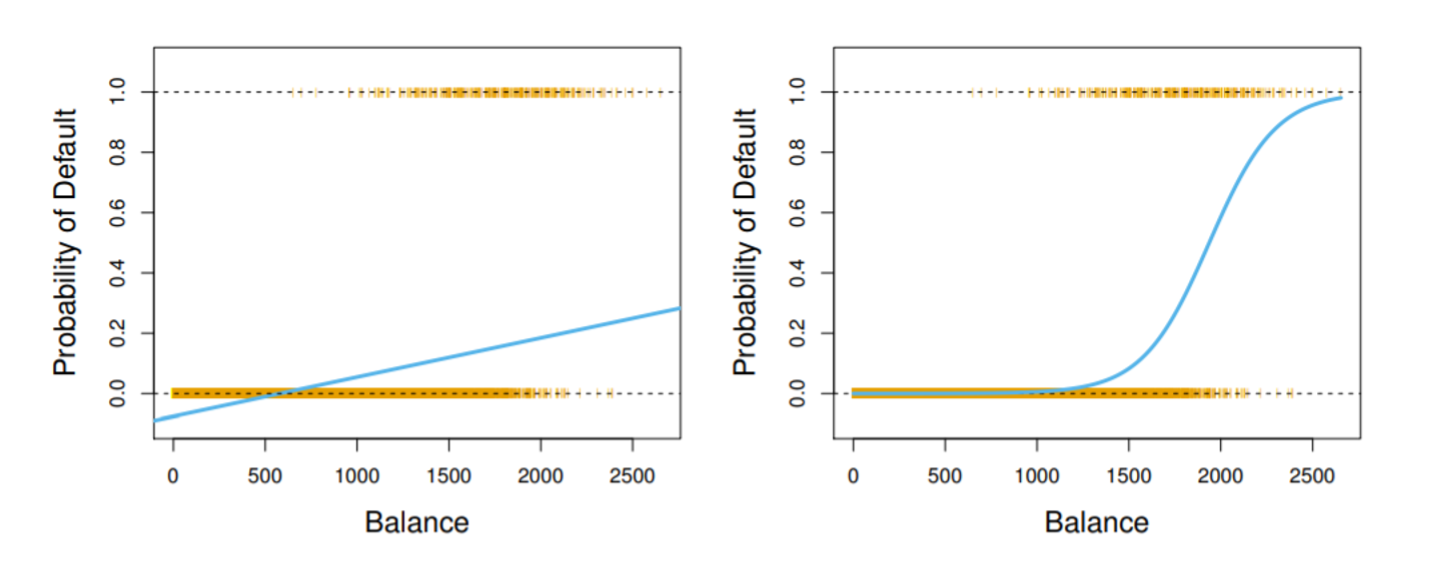

In [9]:
Image(filename="D:/Python/2. Nivel II/7/imagenes/imagen4.png", width=600) 

- Para evitar este problema, debemos modelar $\pi$ usando una función que de como salidad un valor que se encuentra entre 0 y 1 para todos los valores de X.

- En la regresión logística, es usada la función logística
$$\pi = \frac{e^{\beta_0+ \beta_1X}}{1+e^{\beta_0+\beta_1X}}$$
<br>

- Se puede observar que el modelo logístico captura mejor el rango de probabilidades que el modelo de regresión lineal mostrado en el lado izquierdo.

- La probabilidad ajustada promedio en ambos casos es 0.3333, la cual es la misma que la proprción total de morosos en la data.
<br>

- Con algunas manipualciones básicas se puede obtener
$\frac{\pi}{1-\pi} = e^{\beta_0+\beta_1X}$

- El valor $\frac{\pi}{1-\pi}$ es conocido como odds y puede tomar cualquier valor entre 0 y $\infty$
<br>

- Los valores de odds cercanos a 0 o a $\infty$ indican probabilidades muy bajas o muy altas de ser morosos, de manera respectiva.
<br>

- Por ejemplo, en promedio 1 de 5 personas con un odd de 1/4 séra morosos dade que $\pi$ =0.2 implica que los odds son de $\frac{0.2}{1-0.2}= 1/4$

- Del mismo modo, en promedio nueve de cada diez personas con odds de 9 séra moroso, dado que $\pi$ = 0.9 implica un odds de $\frac{0.9}{1-0.9}=9$
<br>

- Tomando logaritmos a la anterior ecuación se obtiene
$$log \left(\frac{\pi}{1-\pi}\right) = \beta_0 + \beta_1 X$$
<br>

- La expresión de lado izquierdo es conocido como logit.}

- A diferencia de la regresión lineal simple, la cantidad que $\pi$ cambie ante un cambio unitario de X depende del nivel actual de esta variable.
<br>

- Si $\beta_1$ es negativo, el incremento de X estará asociado con un incremento de $\pi$.
<br>

- Si $\beta_1$ es positivo, el incremento de X estará asociado con una disminución de $\pi$.

____
[Ir a inicio](#beginning)

### Regresión binaria

- **Componente aleatorio:** Sean $Y_1,..., Y_n$ v.a. dicotómicas independientes. Asuminedo que $y_1 = 1 $ tiene la probabilidad $\pi_i$ y $y_1$ = 0 con probabilidad 1 - $\pi_i$:
$$y_i\thicksim Bernoulli(\pi)$$
<br>

- **Componente sistemático:**
$$n_i = \beta_1x_{1i}+... + \beta_1x_{pi}= x^T_i \beta$$
    donde $n_i$ es denominado como predictor lineal y $x_i= (x_{i1},....x_{ip})$ es un vector de covariables, donde $x_{i1}$ igual a 1 corresponde al intercepto.
<br>

- **Función de Enlace**
$$g(\pi_i) = n_i$$
    donde $g(.)$ es una función monótona y diferenciable.
<br>

- **Función de respuesta:**
$$\pi_i = \pi(x_i)=h(n_i)=h(x_i\beta), i = 1,..., n$$
    donde $h(.)$ es un función de distribución acumulativa monótona estrictamente creciente sobre la recta de los números reales.
    Esto asegura que $h(n) \in [0,1]$ y $g= h^{-1}$

<a id='part10'></a>
### Enlaces comunes

- **Enlace Logit**
$$\log \left(\frac{\pi(x)}{1-\pi(x)}\right)=\beta_1+\beta_2x_2+... + \beta_px_p$$
<br>

- **Enlace Probit**
$$\phi(\pi(x))^{-1} = \beta_1+ \beta_2x_2+....+\beta_px_p$$
    donde $\phi(.)$ es la f.d.a. de la normal estandar.
<br>

- **Enlace log-log complementario (clogclog)**
$$\log-\log(1-\phi(x))=\beta_1 + \beta_2x_2+...+\beta_px_p$$

____
[Ir a inicio](#beginning)

<a id='part9'></a>
## 4. Definición del modelo


### Definición del modelo

- El modelo de regresión logística múltiple está expresado por:
$\log\left(\frac{\pi(x)}{1-\pi(x)}\right) = \beta_1+\beta_2x_2+...+\beta_px_p$
    donde $x= (1,x_2,...,x_p)^T$ contiene los valores observados de las variables explicativas. Esto es, se tiene un modelo para el logaritmo de las odds (log-odds) $\log\left(\frac{\pi(x)}{1-\pi(x)}\right)$.. Usando la transformación con la función exponencial se obtiene:
$$\frac{\pi(X)}{1-\pi(X)} = exp(\beta_1).exp(\beta_1x_2)...exp(\beta_px_p)$$
    lo cual implica que los efecto de las covariables afectan los odds $\frac{\pi(x}{1-\pi(x)}$ en una forma exponencial multiplicativa.

____
[Ir a inicio](#beginning)


### Estimación

- El proceso iterativo para obetener $\widehat{\beta}$ puede ser expresaso como un proceso iterativo de mínimos cuadrados reponderados.
<br>

$$\beta^{m+1}=\left(X^TV^{(m)}X\right)^{-1}X^TV^{(m)}z^{(m)}$$ 
- donde $V= diag\{\pi_1(1-\pi_1),....,\pi_n(1-\pi_n)\}, z=(z_1,...,z_n)^T$ es la varible dependiente modificada $z_i=n_i+(y_i-\pi_i)/\pi_i(1-?pi_i), m= 0.1,.... $ y $i=1,...,n$
    Para datos agrupados (k-grupos), sustituidos $n$ por $k$, 
    $V= diag\{n_1\pi_1(1-\pi_1,...,n_k\pi_k(1-\pi_k)\}$ y <br>
    $z_i=n_i+(y_i-n_i\pi_i)/n_i\pi_i(1-\pi_i)$. Asintóticamente, si $n \rightarrow \infty$ en el primer caso y $n_i/n \rightarrow a_i > 0,\widehat{\beta}-\beta \sim N_p\left(0,(X^TVX)^{-1}\right)$.

### Interpretación de los coeficientes.

- Basado en el predictor linel:
$$n_i=\beta_1x_{1i}+...+\beta_1x_{pi}=x^T_i\beta$$
<br>

- Los odds (ventajas):
$$\frac{\pi_i}{1-\pi_i}= \frac{P(y_i=1|x_i)}{P(y_i=0|x_i)}$$
<br>

- siguen el modelo multiplicativo
$$\frac{P(y_i=1|x_i)}{P(y_i=0|x_i)} = exp(\beta_1).exp(\beta_2x_2)...exp(\beta_px_p)$$
<br>

- Si, por ejmplo, $x_i1$ se incrementan en una unidad, los siguientes cambios se aplican a la razón de odds:
$$\frac{P(y_i=1|x_{i1},...)}{P(y_i=0|x_{i1},...)}/\frac{P(y_i=1|x_{i1}+1,...)}{P(y_i=0|x_{i1}+1,...)}=exp(\beta_1)$$

- De acuerdo a esto:
    - $\beta>0:P(y_i=1/P(y_i=0)$ se incrementa.
    - $\beta<0:P(y_i=1/P(y_i=0)$ se disminuye.
    - $\beta=0:P(y_i=1/P(y_i=0)$ se mantiene constante.
<br>
<bt>

    
- A partir de lo anterior podemos dar una interpretación a los parámetros del modelo:
    - $\beta_0$ es el valor del logit cuando las variables predictoras son nulas.
    - $\beta_1$ es la variación del logit cuando $x_j$ se incrementa en una unidad y las demás variables se mantienen constantes.

- Alternativamente, podemos también interpretar a $e^{\beta_j}$ como la variación porcentual del riesgo relativo cuando $x_j$ se incrementa en una unidad y las demás variables se mantienen constantes.
- Note que si $x_j$ es una variable dummy asociada a alguna categoría de una variable categórica, entonces esta variación debe interpretarse como un cambio porcentual representativo por $x_j$, manteniéndose las demás vairables constantes.

____
[Ir a inicio](#beginning)

<a id='part10'></a>
## 5. Criterios de Selección de modelos I


### Selección del modelos

- Una vez definido el conjunto de covariables (o factores) a ser incluido en el modelo, el siguiente paso es encontrar un modelo reducido que incluya a las covariables e interacciones más importantes.
<br>

- Es posible resolver este problema usando los métodos usuales de selección de vairables, pero la cuestión de la interpretación de los parámetros es crucial en un modelo logístico, por lo que el optar por un forma mecánica de selección puede llevar a obtener un modelo sin sentido y de difícil interpretación.

- Particularmente, la inclusión de ciertas interacciones impone la inclusión en el modelo de los respectivos efectos principales de orden inferior, dado el punto de vista del principio de jerarquía.
<br>

- Muchas veces, variables consideradas importantes para un objetivo dado no deben ser eliminadas del modelo, debido a la falta de sifnificancia estadística.


### Método de Akaike

- Un procedimiento más sencillo para seleccionar variables explicativas en un modelo logístico es a través del método de Akaike. Una sugerencia es realizar primero la selección de los efectos principales y luego en un segundo paso, las interacciones de 1er orden. Para ilustrar una aplicación del método, vamos a suponer que las respuestas binarias estan almacenadas en rep las variables explicativas están denotadas por var1, var2 y var 3. El ajuste del modelo logístico apenas con los efectos principales puede ser realizado a través de los comandos:
<br>

$$ajuste <glm(resp \sim var1+ var2 + var3, family=binomial)$$

- La selección de los efectos principales puede ser realizada por los comandos:
    require(MASS)
    stepAIC(ajuste)
<br>

    - Eventualmente algunas variables explicativas seleccionados pueden no ser significativas marginalmente y la elimincación de las mismas del modelo podrá ser confirmada a través de algún test de razón de verosimilitud. La inclusión de interacciones de 1er orden puede ser realizadas individualmente dento de aquellas interacciones de interés o de fácil interpretación.

____
[Ir a inicio](#beginning)

<a id='part11'></a>
## 6. Criterios de Ajuste

- Dado que potencialmente existe una gran cantidad de variables que podrían ser usadas para clasificar $Y$, es importante tener algunos criterios que nos midan el ajuste de estos modelos.

- Supongamos un modelos de regresión logística( que llamaremos saturado) con k variables predictoras. El modelo más simple que podría considerarse sería uno con solo el intercepto. Si el modelo saturado brinda información útil para estimar la probabilidad de éxito, entonces este debería ajustar mucho mejor que tal modelo, lo que vería reflejado en una mayor función de verosimilitud $L$ estimada. Denotado por $L_0$ y $L_s$, respectivamente, a las funciones de verosimilitud estimadas bajo los modelos solo con intercepto y saturado, Cox y Snell propusieron el siguiente coeficiente $R^2$ de ajuste
<br>

$$R^2_{CS}= 1 - \left(\frac{L_0}{L_S}\right)^{\frac{2}{n}}$$

- Claramente mientras más cercano a 1 esté coeficiente, mejor ajuste tendrá el modelo saturado.
- Nótese sin embargo, que la cota 1 no se alcanza, pues en el mejor de los casos; es decir, en un ajuste perfecto, se tendrá que $L_S=1$; así el maximo valor que podrá tomar el coeficiente anterior será
<br>

$$ R^2_{max} = 1 - L^{\frac{2}{n}}_0$$

- En tal sentido Nagelkerke propuso corregir el pseudo coeficiente de determinación anterior, para acotarlo al inventario[0, 1], tomando
$$R^2=\frac{R^2_{CS}}{R^2_{max}}$$

____
[Ir a inicio](#beginning)


### Contraste de Hosmer y Lemeshow 

- Cunado el número k de grupos es fijo en un experimento binomial y $\frac{n_1}{n} \rightarrow a_i>0$ cuando $n\rightarrow\infty$ el desvío $D(y;\widehat{u}$ sigue una distribución chi cuadrado con k-p grados de libertad, bajo el hecho de que la hipótesis del modelo adoptado sea verdadera.
- Este resultado no es válido cuando $n \rightarrow \infty$ y $n_i\pi_i(1-\pi_i)$ queda limitado.
- En ese caso, Hosmer y Lemeshow (1989) sugieren una estadádistica alternativa para la evaluación de la calidad de ajuste.

- Esa estadística es definidad comparando el npumero observado con el npumero esperado de exitos de $g$ grupos formados.
- El primer grupo deberá contener $ n'_1$ elementos correspondientes a las $n´_i$ de menores probabilidades ajustadas, las cuales serán denotadas por $\widehat{\pi}_{(1)}\leq\widehat{\pi}_{(2)}\leq...\widehat{\pi}_{(n´_1)}$

- El segundo grupo deberá de contener los $n'_2$ elementos correspondientes a las siguientes probabilidades ajustadas $\widehat{\pi}_{(n'_1+1)}\leq\widehat{\pi}_{(n'_1+2)}\leq...\widehat{\pi}_{(n'_1+n'_2)}$
- Los demás grupos se conforman de manera similar, hasta el último grupo se conforman de manera similar, hasta el último grupo que deberá contener las $n'_g$ mayores probabilidades ajustadas $\hat{\pi}_{(n'_1+...n'_g+1)}\leq\hat{\pi}_{(n'_1+...n'_g+2)}\leq...\leq\hat{\pi}_{(n)}$
- El número observado de sucesos en el primer grupo formado será dado por $O_1= \sum^{n'_1}_{j=1} y_j. $ donde $y_j=0$ si el elemento correspondiente es un fracaso y $y_j=1$ si es un exito.
- Generalizando, obetenenmos $O_1 = \sum^{n'_1+...+n'_i}_{j=n'_1+...+n'_i-1+1} y_j, 2\leq i \leq g.$

____
[Ir a inicio](#beginning)

### Criterios de ajuste

- El estadístico es definido por:
$$\hat{C} =\sum^g_{i=1}\frac{(O_i-n'_1\bar{\pi}_1)^2}{n'_i\bar{\pi}_i(1-\bar{\pi}_i)}$$
    donde
   $$ \bar{\pi}_1 = \frac{1}{n'_1}\sum^{n'_1}_{j=1}\hat{\pi}_{(j)}$$y$$\bar{\pi}_i=\frac{1}{n'_i}\sum^{n'_1+...+n'_i}_{j=n'_1+....+n'_{i-1}+1}\hat{\pi}_{(j)}$$

- Hosner y Lemeslow sugieren la formación de $g=10$ grupos del mismo tamaño ( aproximadamente ), de modo que el primer grupo contenga $n'_1 = 1 $, $ \sphericalangle_1$, es relativamente más fácil formar los 10 grupos con tamalos aproximadamente iguales.

- Por otro lado, cuando hay empates, puede ser necesario que dos individuos con la misma conﬁguración de covariables sean colocados en grupos adyacentes a ﬁn de que los grupos formados no tengan tamanños muy desiguales.
- Hosmer y Lemeshow veriﬁcaron a trav´es de simulaciones que la distribución  nula asintótica de $\hat{C}$ puede ser bien aproximada por una distribuci´on chi-cuadrado con $(g - 2)$ grados de libertad.

____
[Ir a inicio](#beginning)

<a id='part12'></a>
## 7. Curvas ROC I

- Los valores pronosticados de la variable dicotÓmica dependiente $Y_i$ para cada sujeto $i$ son obtenidos en base a las probabilidades estimadas de éxito. 
- Aquí se predice un éxito si $\hat{\pi} \geq c$, donde c es un punto de corte que a priori puede tomarse como 0.5. 
- Sin embargo, dependiendo del contexto y las precisiones que uno quisiera obtener un punto de corte de $c = 0.5$ resulta arbitrario y puede no ser óptimo en casos donde por ejemplo las probabilidades de éxito son muy extremas.

- La pregunta es entonces, ¿Cómo determinar este punto? 
- Las curvas ROC (de Receiver Operating Characteristic) nos proveen de una herramienta útil para tal propósito.

- Las curvas ROC (Altman y Bland, 1994; Brown y Davis, 2006; Fawcett, 2006) fueron diseñadas como un método general para que, dado un conjunto de datos, determinar un umbral efectivo tal que los valores sobre el umbral son indicadores de un evento especíﬁco. 
- Las curvas ROC pueden ser usada para determinar puntos de corte alternativo para las probabilidades de las clases. 
- Para cada umbral candidato, el ratio de verdaderos positivos resultante (sensitividad) y de falsos positivos (uno menos la especiﬁcidad) son graﬁcados uno contra el otro.

- Este gráﬁco es útil para encontrar un umbral que apropiadamente maximice el equilibrio entre la sensitividad y la especiﬁcidad. 
    - Verdaderos positivos -> Sensitividad 
    - Falsos positivos -> Especiﬁcidad 
- También se puede usar como evaluación cuantitativa para contrastar dos o más modelos con diferentes predictores (mismo modelo) o clasiﬁcadores distintos (comparación entre modelos), calculando el área debajo de la curva. 
- El modelo más óptimo debería ser desplazado hacia la esquina superior izquierda de la gráﬁca.

- Una curva ROC se construyen en base a: 
    - La sensibilidad $(S)$, deﬁnida como $S=\frac{TP}{TP+FN}$; es decir, la proporción de objetos correctamente clasiﬁcados como éxitos e, informalmente, conocidos como la proporción de verdaderos positivos. 
    - La especiﬁcidad (E), deﬁnido como $S=\frac{TN}{FP+TN}$ ; es decir, la proporción de objetos correctamente clasiﬁcados como fracasos. 
- La curva ROC no es sino la gráﬁca de $1 - E = \frac{n_12}{n_2}$ o proporción de falsos positivos en el eje de las abscisas frente a la sensibilidad S o proporción de verdaderos positivos en el eje de las ordenadas, para diferentes valores del punto de corte $c ∈ [0,1]$. 

- Un modelo ideal seriaa aquel que tuviera 100% de sensibilidad y 100% de especiﬁcidad, situándose en el margen superior izquierdo de la gráﬁca. Y el peor modelo, sería aquel que viniera representado por una línea diagonal desde el margen inferior izquierdo hasta el margen superior derecho. En este último caso, cada incremento en la sensibilidad, vendría asociado a un incremento de igual magnitud en la proporción de falsos positivos. Es obvio, que la mayoría de los modelos se encuentran entre estos dos extremos, y que aquellos modelos que tengan una buena predicción, obtendrán una curva que se alejaría de la diagonal para aproximarse hacia el vértice superior izquierdo.

- Esta curva nos sirve para objetivar como varían conjuntamente la sensibilidad y la especiﬁcidad y comprobar la exactitud del pronóstico en distintos puntos de corte. Por lo general, el mejor punto de corte se situá en la zona donde tuerce la curva. Una vez obtenido el mejor punto de corte, acorde a los objetivos del estudio, podremos ﬁnalmente realizar la clasiﬁcación.

____
[Ir a inicio](#beginning)


### Regiones de la curva ROC

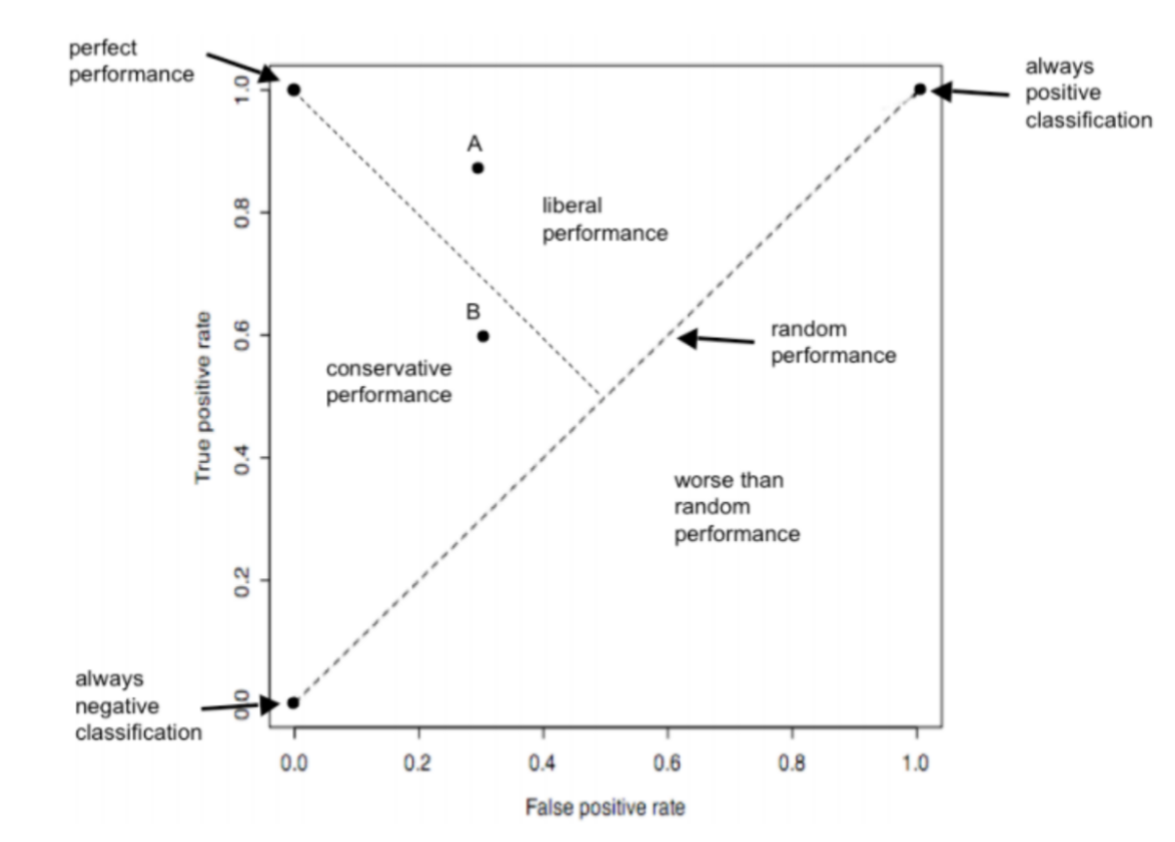

In [10]:
Image(filename="D:/Python/2. Nivel II/7/imagenes/imagen5.png", width=600) 

____
[Ir a inicio](#beginning)


### Ejemplos de Curva ROC

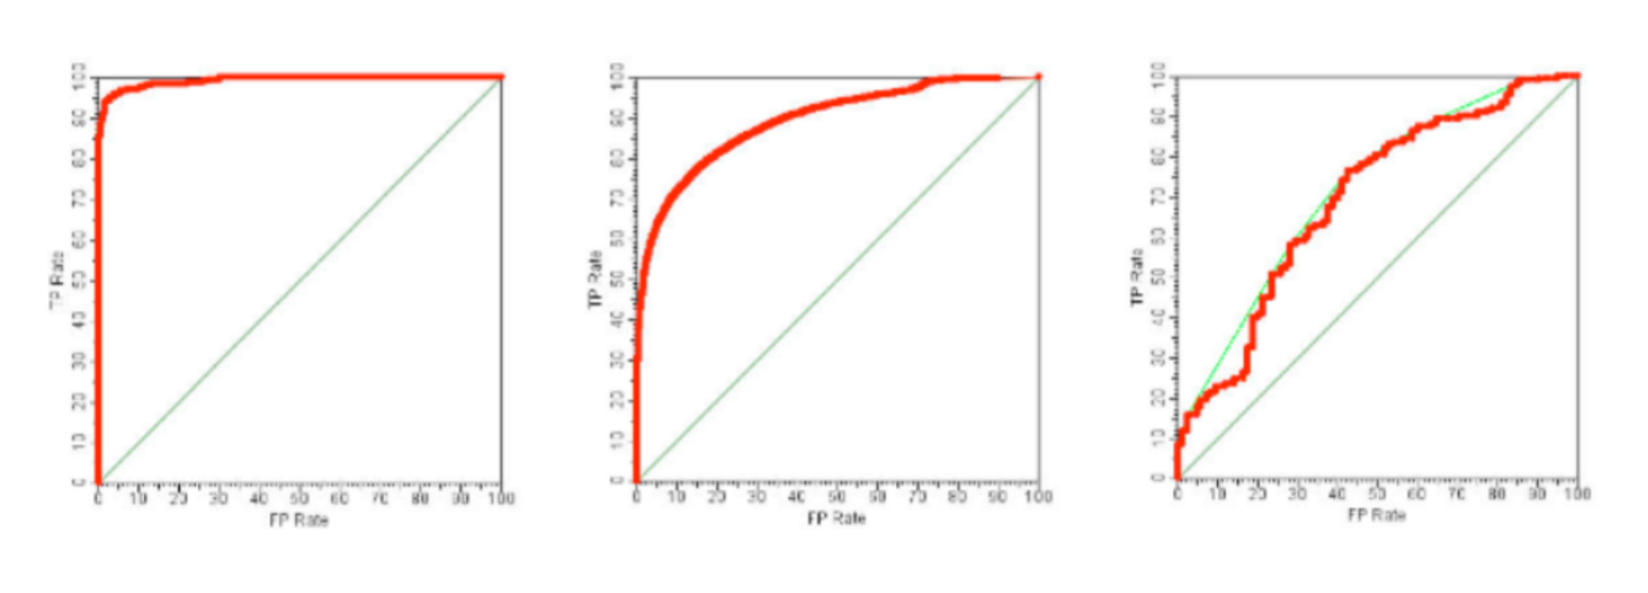

In [11]:
Image(filename="D:/Python/2. Nivel II/7/imagenes/imagen6.png", width=600) 

____
[Ir a inicio](#beginning)